# rf316_llratioplot
Multidimensional models: using the likelihood ratio technique to construct a signal
enhanced one-dimensional projection of a multi-dimensional pdf




**Author:**  Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:18 AM.</small></i>

In [1]:
import ROOT

Create 3D pdf and data
-------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -5, 5)
y = ROOT.RooRealVar("y", "y", -5, 5)
z = ROOT.RooRealVar("z", "z", -5, 5)

Create signal pdf gauss(x)*gauss(y)*gauss(z)

In [3]:
gx = ROOT.RooGaussian("gx", "gx", x, 0.0, 1.0)
gy = ROOT.RooGaussian("gy", "gy", y, 0.0, 1.0)
gz = ROOT.RooGaussian("gz", "gz", z, 0.0, 1.0)
sig = ROOT.RooProdPdf("sig", "sig", [gx, gy, gz])

Create background pdf poly(x)*poly(y)*poly(z)

In [4]:
px = ROOT.RooPolynomial("px", "px", x, [-0.1, 0.004])
py = ROOT.RooPolynomial("py", "py", y, [0.1, -0.004])
pz = ROOT.RooPolynomial("pz", "pz", z)
bkg = ROOT.RooProdPdf("bkg", "bkg", [px, py, pz])

Create composite pdf sig+bkg

In [5]:
fsig = ROOT.RooRealVar("fsig", "signal fraction", 0.1, 0.0, 1.0)
model = ROOT.RooAddPdf("model", "model", [sig, bkg], [fsig])

data = model.generate({x, y, z}, 20000)

Project pdf and data on x
-------------------------------------------------

Make plain projection of data and pdf on x observable

In [6]:
frame = x.frame(Title="Projection of 3D data and pdf on X", Bins=40)
data.plotOn(frame)
model.plotOn(frame)

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x integrates over variables (y,z)


Define projected signal likelihood ratio
----------------------------------------------------------------------------------

Calculate projection of signal and total likelihood on (y,z) observables
i.e. integrate signal and composite model over x

In [7]:
sigyz = sig.createProjection({x})
totyz = model.createProjection({x})

Construct the log of the signal / signal+background probability

In [8]:
llratio_func = ROOT.RooFormulaVar("llratio", "log10(@0)-log10(@1)", [sigyz, totyz])

Plot data with a LL ratio cut
-------------------------------------------------------

Calculate the llratio value for each event in the dataset

In [9]:
data.addColumn(llratio_func)

Extract the subset of data with large signal likelihood

In [10]:
dataSel = data.reduce(Cut="llratio>0.7")

[#1] INFO:InputArguments -- The formula llratio>0.7 claims to use the variables (x,y,z,llratio) but only (llratio) seem to be in use.
  inputs:         llratio>0.7


Make plot frame

In [11]:
frame2 = x.frame(Title="Same projection on X with LLratio(y,z)>0.7", Bins=40)

Plot select data on frame

In [12]:
dataSel.plotOn(frame2)

Make MC projection of pdf with same LL ratio cut
---------------------------------------------------------------------------------------------

Generate large number of events for MC integration of pdf projection

In [13]:
mcprojData = model.generate({x, y, z}, 10000)

Calculate LL ratio for each generated event and select MC events with
llratio)0.7

In [14]:
mcprojData.addColumn(llratio_func)
mcprojDataSel = mcprojData.reduce(Cut="llratio>0.7")

[#1] INFO:InputArguments -- The formula llratio>0.7 claims to use the variables (x,y,z,llratio) but only (llratio) seem to be in use.
  inputs:         llratio>0.7


Project model on x, projected observables (y,z) with Monte Carlo technique
on set of events with the same llratio cut as was applied to data

In [15]:
model.plotOn(frame2, ProjWData=mcprojDataSel)

c = ROOT.TCanvas("rf316_llratioplot", "rf316_llratioplot", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()
c.SaveAs("rf316_llratioplot.png")

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x averages using data variables (y,z)
[#1] INFO:Plotting -- RooAbsReal::plotOn(model) only the following components of the projection data will be used: (y,z)
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2


Info in <TCanvas::Print>: png file rf316_llratioplot.png has been created


Draw all canvases 

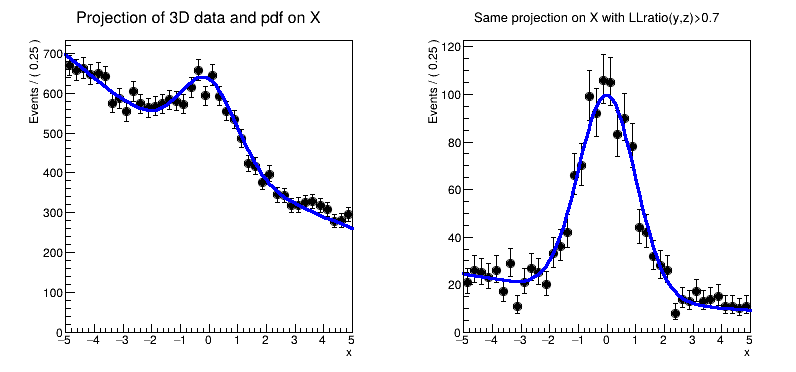

In [16]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()